In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from ln_utils import *
from transaction_simulator import *

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import sys
from datawand.parametrization import ParamHelper
ph = ParamHelper("../","LNGraph",sys.argv)

['/home/fberes/miniconda3/envs/dm-3-env/lib/python3.7/site-packages/ipykernel_launcher.py', '-f', '/home/fberes/.local/share/jupyter/runtime/kernel-d1fb86bb-88a3-4cfd-899c-69ee33970132.json']
/home/fberes/git_hulk2/LNDynamicTopology
/home/fberes/git_hulk2/LNDynamicTopology
Default parameters:
{'alpha': None, 'amount_sat': 50000, 'data_dir': '/mnt/idms/fberes/data/bitcoin_ln_research', 'day_interval': 7, 'drop_disabled': True, 'experiment_id': 'trial', 'num_transactions': 6000, 'sim_dir': '2019-09-03_15:28:05_50000sat_k5000_aNone_dropFalse', 'snapshot_id': 0, 'snapshot_ids': [0, 1, 2, 3, 4, 5, 6, 7, 8], 'weight': None, 'weight_cols': [None, 'num_channels', 'capacity', 'fee_base_msat', 'fee_rate_milli_msat']}
Custom parameters:
{}


# 1. Load data

In [5]:
node_names = pd.read_csv("/mnt/idms/fberes/data/bitcoin_ln_research/node_names.csv")

In [6]:
node_names.head()

,name,cap_ratio,cap_sat,pub_key,is_lnbig
0,Red.de.Rayos,0.085,87746902,033ac2f9f7ff643c235cc247c521663924aff73b26b381...,False
1,J4K0B [LND],0.000,431216,03dce085156c59854f5d66c87461f35001501d4bffa33d...,False
2,Sauerland Route,0.015,15000000,036fda475a47bc45f90ac43fd61c3ab8bbc0bcfed64aaa...,False
3,bcwat.ch,0.049,50777766,021f5bfc335e949e555e93a1532b670a37ef7325410d26...,False
4,0366409a4825691770ff2,0.000,0,0366409a4825691770ff218af75359167038ef66957344...,False


In [7]:
LNBIG_nodes = list(node_names[node_names["is_lnbig"]]["pub_key"])
len(LNBIG_nodes)

25

In [8]:
node_names = node_names[["name","pub_key"]]

In [9]:
def load_data(experiment_files, snapshots, file_postfix):
    parts = []
    for snap_id in snapshots:
        data_files = []
        for f in experiment_files[snap_id]:
            sample_id = f.split(".")[-1]
            #if file_postfix == "router_incomes":
            #    df = pd.read_csv("%s/%s.csv" % (f, file_postfix), header=None)
            #    df.columns = ["node","income"]
            #else:
            df = pd.read_csv("%s/%s.csv" % (f, file_postfix))
            df["sample"] = int(sample_id)
            data_files.append(df)
        tmp_df = pd.concat(data_files, axis=0, sort=False)
        tmp_df["snapshot_id"] = snap_id
        parts.append(tmp_df)
        print(snap_id)
    return parts

#experiment_id = "2019-07-04_11:12:08_200000sat_k30000"
#experiment_id = "2019-07-05_14:39:09_200000sat_k30000"
#experiment_id = "2019-07-05_14:39:09_500000sat_k30000"
#experiment_id = "2019-08-06_13:42:00_200000sat_k30000_aNone"
#experiment_id = "2019-08-09_14:31:08_200000sat_k30000_aNone_dropTrue"
#experiment_id = "2019-08-09_14:31:08_127807sat_k50000_aNone_dropTrue"
#experiment_id = "2019-09-01_18:07:51_200000sat_k30000_aNone_dropTrue"
#experiment_id = "2019-09-02_17:05:18_100000sat_k5000_aNone_dropFalse"
#experiment_id = "2019-09-03_15:28:05_50000sat_k5000_aNone_dropFalse"
#experiment_id = "2019-09-05_14:35:13_50000sat_k6000_aNone_dropTrue"
experiment_id = ph.get("sim_dir")

snapshots = range(7)
simulation_dir = "/mnt/idms/fberes/data/bitcoin_ln_research/simulations/"

In [10]:
#experiment_id = ph.get("sim_dir")
experiment_id = "2019-09-06_22:03:19_50000sat_k6000"
snapshots = range(40)#range(54)
simulation_dir = "/mnt/idms/fberes/data/bitcoin_ln_research/simulations_1days/"

In [11]:
experiment_folders = get_experiment_files(experiment_id, snapshots, simulation_dir)

In [12]:
experiment_folders[0]

['/mnt/idms/fberes/data/bitcoin_ln_research/simulations_1days//0/2019-09-06_22:03:19_50000sat_k6000.2',
 '/mnt/idms/fberes/data/bitcoin_ln_research/simulations_1days//0/2019-09-06_22:03:19_50000sat_k6000.1',
 '/mnt/idms/fberes/data/bitcoin_ln_research/simulations_1days//0/2019-09-06_22:03:19_50000sat_k6000.0',
 '/mnt/idms/fberes/data/bitcoin_ln_research/simulations_1days//0/2019-09-06_22:03:19_50000sat_k6000.3',
 '/mnt/idms/fberes/data/bitcoin_ln_research/simulations_1days//0/2019-09-06_22:03:19_50000sat_k6000.4']

In [13]:
pricing_pol = load_data(experiment_folders, snapshots, "opt_fees")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [14]:
source_fee = load_data(experiment_folders, snapshots, "source_fees")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [15]:
router_income = load_data(experiment_folders, snapshots, "router_incomes")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


## Router incomes

In [16]:
router_income_col = "fee"#"income"

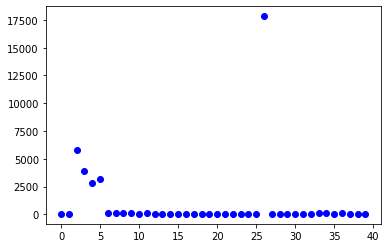

In [17]:
x = snapshots
y = [router_income[i][router_income_col].mean() for i in snapshots]
plt.plot(x,y, "bo")

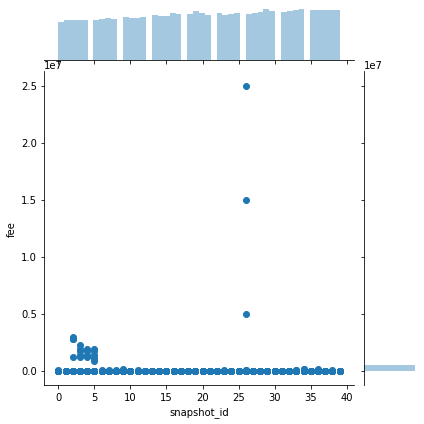

In [18]:
sns.jointplot(data=pd.concat(router_income), x="snapshot_id", y=router_income_col)

In [19]:
all_router_incomes = pd.concat(router_income)

### LNBIG.com traffic and income timeseries

In [20]:
lnb_router_incomes = all_router_incomes[all_router_incomes["node"].isin(LNBIG_nodes)].groupby(["node","snapshot_id"]).agg({router_income_col:"mean","num_trans":"mean"}).sort_values(router_income_col,ascending=False).reset_index()

In [21]:
lnb_router_incomes = lnb_router_incomes.groupby("snapshot_id").agg({router_income_col:"sum","num_trans":"sum"}).reset_index()

In [22]:
lnb_router_incomes.head()

,snapshot_id,fee,num_trans
0,0,2634.150,103.300000
1,1,2548.725,99.950000
2,2,2641.375,103.583333
3,3,3304.800,129.600000
4,4,3195.150,125.300000


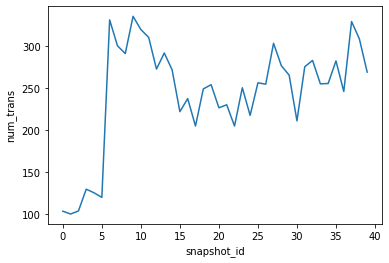

In [23]:
sns.lineplot(x="snapshot_id",y="num_trans",data=lnb_router_incomes)

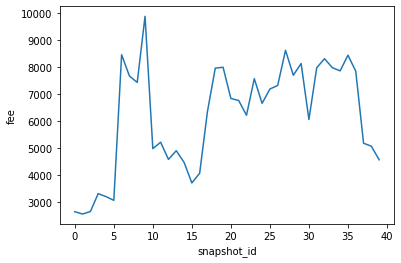

In [24]:
sns.lineplot(x="snapshot_id",y="fee",data=lnb_router_incomes)

### Calculate average routing income and traffic over snapshots and samples

In [25]:
all_router_incomes = all_router_incomes.groupby("node").agg({router_income_col:"mean","num_trans":"mean"}).sort_values(router_income_col,ascending=False).reset_index()

In [26]:
all_router_incomes = all_router_incomes.merge(node_names, left_on="node", right_on="pub_key", how="left").drop("pub_key", axis=1).set_index("node")

In [27]:
other_routers = [
    "0232e20e7b68b9b673fb25f48322b151a93186bffe4550045040673797ceca43cf",
    "03e50492eab4107a773141bb419e107bda3de3d55652e6e1a41225f06a0bbf2d56",
    "0279c22ed7a068d10dc1a38ae66d2d6461e269226c60258c021b1ddcdfe4b00bc4",
    "03021c5f5f57322740e4ee6936452add19dc7ea7ccf90635f95119ab82a62ae268",
    "03c2abfa93eacec04721c019644584424aab2ba4dff3ac9bdab4e9c97007491dda",
    "03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f",
    "03a503d8e30f2ff407096d235b5db63b4fcf3f89a653acb6f43d3fc492a7674019",
    "03abf6f44c355dec0d5aa155bdbdd6e0c8fefe318eff402de65c6eb2e1be55dc3e",
    "0331f80652fb840239df8dc99205792bba2e559a05469915804c08420230e23c7c",
    "0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266",
    "0395033b252c6f40e3756984162d68174e2bd8060a129c0d3462a9370471c6d28f",
    "03cb7983dc247f9f81a0fa2dfa3ce1c255365f7279c8dd143e086ca333df10e278",
    "030c3f19d742ca294a55c00376b3b355c3c90d61c6b6b39554dbc7ac19b141c14f",
    "03bb88ccc444534da7b5b64b4f7b15e1eccb18e102db0e400d4b9cfe93763aa26d",
]

In [28]:
node_income_and_traffic = all_router_incomes.loc[other_routers].reset_index(drop=True)

In [29]:
node_income_and_traffic

,fee,num_trans,name
0,5293.393939,10.565657,zigzag.io
1,4302.270000,34.145000,yalls.org
2,1053.250000,21.065000,ln1.satoshilabs.com
3,293.359375,21.885417,03021c5f5f57322740e4
4,609.004000,48.365000,tippin.me
5,206.520000,34.420000,ACINQ
6,109.200000,24.530303,Sagittarius A
7,821.057625,29.290000,OpenNode
8,504.339750,428.655000,LightningPowerUsers.com
9,250.115250,238.205000,1ML.com node ALPHA


all_router_incomes[(all_router_incomes["num_trans"]>10) & (~all_router_incomes.index.isin(LNBIG_nodes))].head(20)

### LNBIG stats

In [30]:
lnbig_stats = all_router_incomes.loc[LNBIG_nodes][["fee","num_trans"]].sum()

/home/fberes/miniconda3/envs/dm-3-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [31]:
lnbig_stats["name"] = "LNBIG.com"

In [32]:
lnbig_stats

fee            6288.58
num_trans       249.02
name         LNBIG.com
dtype: object

In [33]:
node_income_and_traffic = node_income_and_traffic.append(lnbig_stats, ignore_index=True).sort_values("name")

In [34]:
node_income_and_traffic.to_csv("/mnt/idms/fberes/data/bitcoin_ln_research/results/router_traffic_and_income/%s.csv" % experiment_id, index=False)

In [35]:
alma

NameError: name 'alma' is not defined

## Source fees

In [ ]:
x = snapshots
y = [source_fee[i]["mean_fee"].mean() for i in snapshots]
plt.plot(x,y, "bo")

In [ ]:
sns.jointplot(data=pd.concat(source_fee), x="snapshot_id", y="mean_fee")

## Optimal pricing

In [ ]:
x = snapshots
y = [pricing_pol[i]["opt_delta"].mean() for i in snapshots]
plt.plot(x,y, "bo")

In [ ]:
x = snapshots
y = [pricing_pol[i]["opt_traffic"].mean() for i in snapshots]
plt.plot(x,y, "bo")

In [ ]:
x = snapshots
y = [pricing_pol[i]["origi_income"].mean() for i in snapshots]
plt.plot(x,y, "bo")

In [ ]:
x = snapshots
y = [pricing_pol[i]["opt_income"].mean() for i in snapshots]
plt.plot(x,y, "bo")

### Calculate income revenue

In [ ]:
for df in pricing_pol:
    df["income_diff"] = df["opt_income"] - df["origi_income"]

# 2. Simulation stability

In [ ]:
corrs = ["spearman","kendall","wkendall"]

In [ ]:
def avg_cross_corr(df, snapshot_id, col, methods=corrs, key_col="node"):
    snap = df[snapshot_id]
    sample_num = snap["sample"].max()+1
    cols = [key_col, col]
    merged = snap[snap["sample"]==0][cols].rename({col:col+"_0"}, axis=1)
    for i in range(1,sample_num):
        s = snap[snap["sample"]==i][cols].rename({col:col+"_%i" % i}, axis=1)
        merged = merged.merge(s, on=key_col, how="outer").fillna(0.0)
    merged.drop("node", inplace=True, axis=1)
    res = {}
    for method in methods:
        cnt = corr_mx(merged, method=method).sum().sum() - sample_num 
        denom = sample_num**2-sample_num
        res[method] = cnt / denom
    return res

In [ ]:
origi_inc = pd.DataFrame([avg_cross_corr(pricing_pol, snap_id, "origi_income") for snap_id in snapshots])
opt_inc = pd.DataFrame([avg_cross_corr(pricing_pol, snap_id, "opt_income") for snap_id in snapshots])
income_diff = pd.DataFrame([avg_cross_corr(pricing_pol, snap_id, "income_diff") for snap_id in snapshots])
opt_delta = pd.DataFrame([avg_cross_corr(pricing_pol, snap_id, "opt_delta") for snap_id in snapshots])

In [ ]:
colors = ['b','g','r','m']
fig, axis = plt.subplots(1,3,figsize=(15,4))
x = snapshots
# incomes
axis[0].set_title("INCOME mean cross correlations")
for i, c in enumerate(corrs):
    axis[0].plot(x,origi_inc[c], colors[i]+'-', label=c+"_orig")
    axis[0].plot(x,opt_inc[c], colors[i]+'--', label=c+"_opt")
axis[0].set_xlabel("snapshot")
axis[0].legend()
# income_diff
axis[1].set_title("INCOME_DIFF mean cross correlations")
for i, c in enumerate(corrs):
    axis[1].plot(x,income_diff[c], colors[i]+'-', label=c)
axis[1].set_xlabel("snapshot")
axis[1].legend()
# opt_delta
axis[2].set_title("OPT_DELTA mean cross correlations")
for i, c in enumerate(corrs):
    axis[2].plot(x,opt_delta[c], colors[i]+'-', label=c)
axis[2].set_xlabel("snapshot")
axis[2].legend()
plt.show()

#### Incomes observations

- taking mean cross correlation of user incomes (original and optimal)
- weighted kendall-tau gives decreased to 0.90 from 0.95 (after including capacity maintenance)
- in case of unweighted spearman and kendall the optimal income correlates better across samples 

#### income_diff observations¶

- taking mean cross correlation of income difference (optimal income - original income)
- weighted kendall-tau decreased to 0.80 from 0.93 (after including capacity maintenance)

#### opt_delta observations¶

- taking mean cross correlation of optimal base fee change
- weighted kendall-tau decreased to 0.70 from 0.90 (after including capacity maintenance)

**CONCLUSION: our base_fee optimization procedure is less efficient (meaningful) after the implementation of capacity maintenance!!!**

# 3. Income revenue analysis

In [ ]:
def cut_into_categories(df):
    #categories = [df[:10], df[10:30], df[30:50], df[50:100]]
    #categories = [df[:20], df[20:50], df[50:100], df[100:200]]
    #categories = [df[:10], df[10:20], df[20:30], df[30:40], df[40:50], df[50:100], df[100:500]]
    categories = [df[:10], df[10:20], df[20:50], df[50:100], df[100:500]]
    #categories = [df[:50], df[50:100], df[100:500]]#, df[200:500]]
    return categories

def merge_categories(categories):
    for i, cat in enumerate(categories):
        cat["category"] = i
    return pd.concat(categories)
    
def show_stats(snap_id, col="income_diff"):
    mean = pricing_pol[snap_id].groupby("node").mean().sort_values("origi_income", ascending=False)
    categories = cut_into_categories(mean)
    return [float(cat[[col]].mean()) for cat in categories]

In [ ]:
x = range(5)
#x = range(7)

### Visualize each snapshot

df = pd.DataFrame([show_stats(i, "income_diff") for i in snapshots])

plt.Figure(figsize=(10,10))
for i in snapshots:
    plt.plot(x, show_stats(i, "income_diff"), label=i)
plt.yscale("log")
plt.legend()

plt.Figure(figsize=(10,10))
for i in snapshots:
    plt.plot(x, show_stats(i, "opt_traffic"), label=i)
plt.legend()

### Average stats (over all snapshots and samples)

average_stats = pricing_pol[0].groupby("node").mean().sort_values("origi_income", ascending=False)[["income_diff","origi_income","opt_income","opt_traffic","opt_delta"]]

In [ ]:
all_records = pd.concat([pricing_pol[i] for i in snapshots])

In [ ]:
average_stats = all_records.groupby("node").mean().sort_values("origi_income", ascending=False)[["income_diff","origi_income","opt_income","opt_traffic","opt_delta"]]

In [ ]:
average_stats_cats = cut_into_categories(average_stats)
mean_diff = [float(cat[["income_diff"]].mean()) for cat in average_stats_cats]
mean_traffic = [float(cat[["opt_traffic"]].mean()) for cat in average_stats_cats]
mean_delta = [float(cat[["opt_delta"]].mean()) for cat in average_stats_cats]

In [ ]:
fig, axis = plt.subplots(1,3,figsize=(15,4))
axis[0].plot(x, mean_diff, 'rx')
axis[0].set_xlabel("income category")
axis[0].set_ylabel("mean income_diff")
axis[1].plot(x, mean_delta, 'g*')
axis[1].set_xlabel("income category")
axis[1].set_ylabel("mean opt_delta")
axis[2].plot(x, mean_traffic, 'bo')
axis[2].set_xlabel("income category")
axis[2].set_ylabel("mean opt_traffic")
plt.show()

#### Mean original income for the selected categories

In [ ]:
[float(cat[["origi_income"]].mean()) for cat in average_stats_cats]

### PROBLEM with outliers...

In [ ]:
merged = merge_categories(average_stats_cats)

In [ ]:
sns.boxplot(data=merged, x="category", y="income_diff", whis=2)

average_stats.head(10)

### Nodes above 20K SAT (2.5 USD) income_diff (with alpha=2.0 source distribution)

#### 2019-07-04_11:12:08_200000sat_k30000 (ordered by original income)

1. yalls.org - Read and write articles, with Lightning Network micropayments. (195,925.46 USD)
2. ACINQ - ACINQ is one of the leading companies working on Bitcoin scalability. (507,211.38 USD)
3. 1ML.com node ALPHA (89,453.40 USD)
4. LightningPowerUsers.com (313,406.05 USD)
5. LightningTo.Me - Helping to resolve routing and capacity issues (165,531.35 USD)
6. tomjodh.nl - Buy photos with satoshis (8,709.95 USD) - **TODO RECLASSIFY AS merchant!!!**
7. ? - ? (848.05 USD)

#### 2019-07-05_14:39:09_200000sat_k30000 (ordered by original income)

1. ACINQ - ACINQ is one of the leading companies working on Bitcoin scalability. (507,211.38 USD, 783 channel)
2. 1ML.com node ALPHA (89,453.40 USD, 884 channel)
3. LightningPowerUsers.com (313,406.05 USD, 1,266 channel)
4. LightningTo.Me - Helping to resolve routing and capacity issues (165,531.35 USD, 700 channel)
5. tomjodh.nl - Buy photos with satoshis (8,709.95 USD, 47 channel)
6. ? - ? (859.23 USD, 4 channel)
7. nybemotion - ? (318.35 USD, 3 channel)

#### Additional nodes in 2019-07-05_14:39:09_500000sat_k30000

4. Bitrefill.com - Buy Gift Cards with Bitcoin for 30+ supported services (310,369.63 USD, 305 channel) - **TODO RECLASSIFY AS merchant!!!**
6. tady je slushovo: ? (48,872.23 USD, 336 channel)

### Nodes above 20K SAT (2.5 USD) income_diff (with alpha=None source distribution)

#### 2019-08-06_13:42:00_200000sat_k30000_aNone (ordered by original income)

1. yalls.org
2. ACINQ
3. LightningPowerUsers.com
4. tomjodh.nl
5. Node: 0297b368360113e29032 ???
6. nybemotion

#### 2019-08-09_14:31:08_200000sat_k30000_aNone_dropTrue

1. yalls.org
2. ln1.satoshilabs.com (306,117.70 USD - 824 channels) **(NEW)**
3. LightningPowerUsers.com
4. nybemotion (493.61 USD, 6 channel) ???
5. Amazing_Droopy_3 (113.73 USD, 1 channel?) ???

#### 2019-09-01_18:07:51_200000sat_k30000_aNone_dropTrue (WITH capacity maintenance)

1. LightningPowerUsers.com (237,653 USD, 1261 channels)
2. 1ML.com node ALPHA (64,630 USD, 889 channels)
3. CoinGate (147,272 USD, 462 channels) - CoinGate is the first large cryptocurrency payment gateway to introduce Lightning Network payments to hundreds of merchants with no technical knowledge required
4. lndhub.ru (19,066 USD, 248 channels) - increase connectivity
5. BeerselLightningNode (13,246 USD, 84 channels)
6. BitKassa LN34961 (13,631 USD, 47) - some kind of payment API and BTC tech company
7. Serving Beer (2,107 USD, 13 channels) - is this really a merchant???

In [ ]:
average_stats[average_stats["income_diff"]>20000]